# Stack Overflow EDA 

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import boto3
import mysql.connector

In [2]:
dbc = mysql.connector.connect(
    host = "chiraggodawat-project1.c0gjrzbxaqyw.us-east-1.rds.amazonaws.com",
    user = "admin",
    passwd = "project1",
    port = 3306,
    db = "stackoverflow",
)

In [3]:
cur = dbc.cursor()

In [4]:
#The below cell throws an error as the table was already created. Rerunning again gives this error
cur.execute("CREATE TABLE stackoverflow (Question VARCHAR(500), Answer VARCHAR(5000))")

ProgrammingError: 1050 (42S01): Table 'stackoverflow' already exists

### Reading the CSV using the Amazon S3 links provided

##### The encoding plays an important role while reading the CSV file. Reading the csv with a normal or default utf-8 coding gives an error.

In [5]:
questions_data = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv",encoding = "latin")

In [6]:
answers_data = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv",encoding = "latin")

In [7]:
tags_data = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv",encoding = "latin")

In [8]:
users_data = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv",encoding = "latin")

### Getting a gist of each of the datasets

#### Questions Dataset

In [9]:
questions_data.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [10]:
questions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


#### Answers Dataset

In [11]:
answers_data.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [12]:
answers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


#### Tags Dataset

In [13]:
tags_data.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [14]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


#### Users Dataset

In [15]:
users_data.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [16]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   id                int64 
 2   display_name      object
 3   creation_date     object
 4   last_access_date  object
 5   reputation        int64 
 6   up_votes          int64 
 7   down_votes        int64 
 8   views             int64 
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


### Data Cleaning

After having an idea about the datasets, lets start with the data cleaning of the datasets. We will go for each dataset one by one

#### Questions Dataset Cleaning

In [17]:
questions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


Check for the missing values


In [18]:
questions_data.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

Okay! so we have 2 columns with missing values. Lets see their percentage


In [19]:
questions_data.isnull().sum()*100/len(questions_data)

Id               0.000000
OwnerUserId      1.143317
CreationDate     0.000000
ClosedDate      95.573620
Score            0.000000
Title            0.000000
Body             0.000000
dtype: float64

So we can see that 1.14% of missing values in OwnerUserID and 95.5736% of missing value in Closed Date.

Therefore lets delete the rows with missing values from OwnerUserId Column.

And ideally, as the percentage of missing values for ClosedDate column is too high, We should drop the table. (As it won't provide any relevant info to our analysis)

So lets do it.....

In [20]:
questions_data = questions_data[-(questions_data.OwnerUserId.isnull())]
questions_data.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1194522
Score                 0
Title                 0
Body                  0
dtype: int64

In [21]:
questions_data = questions_data.drop('ClosedDate',axis = 1)


In [22]:
questions_data.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
Score           0
Title           0
Body            0
dtype: int64

So now the missing values are handled in this dataset.

Now lets check the datatype of each column. 

In [23]:
questions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1249762 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1249762 non-null  object 
 3   Score         1249762 non-null  int64  
 4   Title         1249762 non-null  object 
 5   Body          1249762 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 66.7+ MB


The datatype of all the columns looks good. But on observing we see that CreationDate is of the type Object. Lets convert it to date format as it may help us in our analysis in future

In [24]:
questions_data['CreationDate'] = pd.to_datetime(questions_data['CreationDate'])
questions_data.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [25]:
questions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   Score         1249762 non-null  int64              
 4   Title         1249762 non-null  object             
 5   Body          1249762 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 66.7+ MB


Okay, so the data now looks good....

Lets check the max, min, value_counts etc, as their might be some encoding performed for missing values. For eg. -1 may be put to indicate a missing value.

Note: Analysis of dataset will be done in next section, where outliers will also be identified (if any)

In [26]:
# For Columns with Int or float data type
questions_data.describe()

,Id,OwnerUserId,Score
count,1.249762e+06,1.249762e+06,1.249762e+06
mean,2.140840e+07,2.155177e+06,1.770194e+00
std,1.148375e+07,1.801265e+06,1.365188e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.152718e+07,6.589110e+05,0.000000e+00
50%,2.182016e+07,1.611830e+06,0.000000e+00
75%,3.160539e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


In [27]:
questions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   Score         1249762 non-null  int64              
 4   Title         1249762 non-null  object             
 5   Body          1249762 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 66.7+ MB


Above columns looks good. Seems no encoding is used for missing values and there are no more missing values in these column

Also for the remaining data, they are free form text. Hence if there would be any missing values, then it would have shown in '.isnull().sum()' part of code.

So now we are sure that there are no more missing values in this dataset and the types of columns are also handled properly.

Lets check for duplicate rows

In [28]:
questions_data.duplicated().sum()

0

No Duplicate rows found

Lets move on to next dataset


#### Answers Dataset Cleaning

In [29]:
answers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


Lets check for the missing values

In [30]:
answers_data.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

So here also we have missing values in OwnerUserID. Lets check its percentage first

In [31]:
answers_data.isnull().sum()*100/len(answers_data)

Id              0.000000
OwnerUserId     0.655244
CreationDate    0.000000
ParentId        0.000000
Score           0.000000
Body            0.000000
dtype: float64

Again the percentage of missing values is very less. Lets remove those rows

In [32]:
answers_data = answers_data[-(answers_data.OwnerUserId.isnull())]
answers_data.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
ParentId        0
Score           0
Body            0
dtype: int64

Lets check for the missing values inencoded form (if any). For eg -1 may represent a missing value, or something that sort of

In [33]:
answers_data.describe()

,Id,OwnerUserId,ParentId,Score
count,2.001316e+06,2.001316e+06,2.001316e+06,2.001316e+06
mean,1.919704e+07,1.487613e+06,1.812337e+07,2.479975e+00
std,1.167805e+07,1.549051e+06,1.168503e+07,1.592961e+01
min,9.200000e+01,1.000000e+00,8.000000e+01,-4.200000e+01
25%,8.904733e+06,2.818680e+05,7.741250e+06,0.000000e+00
50%,1.871997e+07,9.546430e+05,1.717589e+07,1.000000e+00
75%,2.933869e+07,2.197072e+06,2.809016e+07,2.000000e+00
max,4.014339e+07,7.045028e+06,4.014319e+07,5.718000e+03


Looks good from the above output. (Note: Scores can be negative, hence there is no issue in that)


Now again looking at the Data Types of the column, CreationDate should be changed to a date format. Lets do it....

In [34]:
answers_data['CreationDate'] = pd.to_datetime(answers_data['CreationDate'])
answers_data.head()


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [35]:
answers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   float64            
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
 5   Body          object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 106.9+ MB


Checking for duplicate Rows

In [36]:
answers_data.duplicated().sum()

0

So this dataset is also looks good now. Lets go to next....


#### Tags Dataset Cleaning

In [37]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


Clearly the type of dataset looks good.

Lets check for missing values only

In [38]:
tags_data.isnull().sum()

Id        0
Tag    1113
dtype: int64

Lets see the percentage of null values

In [39]:
tags_data.isnull().sum()*100/(len(tags_data))

Id     0.000000
Tag    0.029672
dtype: float64

In [40]:
tags_data.Tag.value_counts()

javascript      124155
java            115212
c#              101186
php              98808
android          90659
                 ...  
monetdblite          1
meekro               1
scitools             1
gae-python27         1
bpy                  1
Name: Tag, Length: 37034, dtype: int64

We can delete the missing values here as well. But as the tags column is categorical column, lets try a different approach and subsititute the values with the mode of overall Tags Column. This is done as it is highly likely that mode value could substitute the missing values. Also, as the missing values are comparitively very less, its fair enough to make this assumption

In [41]:
mode = tags_data.Tag.mode()[0]
print(mode)

javascript


In [42]:
#This is also an important result. Lets store it in our dB
sql = "INSERT INTO stackoverflow(Question,Answer) VALUES(%s,%s)"
val  = ("Top tag used",str(mode))
cur.execute(sql,val)

In [43]:
tags_data.Tag.fillna(mode,inplace=True)
tags_data.isnull().sum()

Id     0
Tag    0
dtype: int64

In [44]:
tags_data.Tag.value_counts()

javascript      125268
java            115212
c#              101186
php              98808
android          90659
                 ...  
monetdblite          1
meekro               1
scitools             1
gae-python27         1
bpy                  1
Name: Tag, Length: 37034, dtype: int64

In [45]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


Lets check for duplicate rows if any

In [46]:
tags_data.duplicated().sum()

80

In [47]:
tags_data = tags_data[-(tags_data.duplicated())]
tags_data.duplicated().sum()

0

In [48]:
tags_data.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [49]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750914 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 85.9+ MB


#### Users Dataset Cleaning

In [50]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   id                int64 
 2   display_name      object
 3   creation_date     object
 4   last_access_date  object
 5   reputation        int64 
 6   up_votes          int64 
 7   down_votes        int64 
 8   views             int64 
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


Checking for missing values and percentages

In [51]:
users_data.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [52]:
users_data.isnull().sum()*100/len(users_data)

Unnamed: 0          0.000000
id                  0.000000
display_name        0.006833
creation_date       0.000000
last_access_date    0.000000
reputation          0.000000
up_votes            0.000000
down_votes          0.000000
views               0.000000
dtype: float64

Lets delete the missing values

In [53]:
users_data = users_data[-(users_data.display_name.isnull())]
users_data.isnull().sum()

Unnamed: 0          0
id                  0
display_name        0
creation_date       0
last_access_date    0
reputation          0
up_votes            0
down_votes          0
views               0
dtype: int64

In [54]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990344 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   id                int64 
 2   display_name      object
 3   creation_date     object
 4   last_access_date  object
 5   reputation        int64 
 6   up_votes          int64 
 7   down_votes        int64 
 8   views             int64 
dtypes: int64(6), object(3)
memory usage: 151.9+ MB


Lets change the data type of dates columns

In [55]:
users_data['creation_date'] = pd.to_datetime(users_data['creation_date'])
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990344 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype              
---  ------            -----              
 0   Unnamed: 0        int64              
 1   id                int64              
 2   display_name      object             
 3   creation_date     datetime64[ns, UTC]
 4   last_access_date  object             
 5   reputation        int64              
 6   up_votes          int64              
 7   down_votes        int64              
 8   views             int64              
dtypes: datetime64[ns, UTC](1), int64(6), object(2)
memory usage: 151.9+ MB


In [56]:
users_data['last_access_date'] = pd.to_datetime(users_data['last_access_date'])
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990344 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype              
---  ------            -----              
 0   Unnamed: 0        int64              
 1   id                int64              
 2   display_name      object             
 3   creation_date     datetime64[ns, UTC]
 4   last_access_date  datetime64[ns, UTC]
 5   reputation        int64              
 6   up_votes          int64              
 7   down_votes        int64              
 8   views             int64              
dtypes: datetime64[ns, UTC](2), int64(6), object(1)
memory usage: 151.9+ MB


Column Unnamed is not required as it is the same as the id. Lets remove it

In [57]:
users_data = users_data.drop('Unnamed: 0',axis = 1)
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990344 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Dtype              
---  ------            -----              
 0   id                int64              
 1   display_name      object             
 2   creation_date     datetime64[ns, UTC]
 3   last_access_date  datetime64[ns, UTC]
 4   reputation        int64              
 5   up_votes          int64              
 6   down_votes        int64              
 7   views             int64              
dtypes: datetime64[ns, UTC](2), int64(5), object(1)
memory usage: 136.7+ MB


In [58]:
users_data.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


In [59]:
users_data.describe()

,id,reputation,up_votes,down_votes,views
count,1.990344e+06,1.990344e+06,1.990344e+06,1.990344e+06,1.990344e+06
mean,1.480673e+06,4.545769e+04,1.539782e+03,8.212903e+02,9.451433e+03
std,1.543820e+06,1.226415e+05,3.494353e+03,4.199174e+03,7.877838e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.797380e+05,9.310000e+02,5.800000e+01,2.000000e+00,1.090000e+02
50%,9.494760e+05,5.042000e+03,3.530000e+02,1.800000e+01,5.290000e+02
75%,2.183515e+06,2.806100e+04,1.470000e+03,1.490000e+02,2.675000e+03
max,7.045028e+06,1.128126e+06,1.005200e+05,7.495500e+04,1.835157e+06


In [60]:
users_data.display_name.value_counts()

Jon Skeet         3270
Gordon Linoff     3009
Alex              2175
Darin Dimitrov    2144
David             1946
                  ... 
Harish Apkari        1
badou                1
Robert C             1
JesseG               1
Octavioamu           1
Name: display_name, Length: 389234, dtype: int64

There seems to be duplicate rows in this data. Lets check and remove them

In [61]:
users_data.duplicated().sum()

1524908

In [62]:
users_data = users_data[-(users_data.duplicated())]

In [63]:
users_data.duplicated().sum()

0

In [64]:
users_data.display_name.value_counts()

Alex               645
Chris              590
David              488
Mike               446
Matt               419
                  ... 
user6932536          1
dof1985              1
MaLe                 1
oopsi                1
Stephane Nicoll      1
Name: display_name, Length: 389234, dtype: int64

Above output doesn't mean there is any duplicate data. As there can be several people with name as Alex, Chris etc. As date of creation is different, these rows have persisted and only the rows which were exact duplicate have been removed.

In [65]:
users_data.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96


In [66]:
users_data.reset_index(inplace= True)
users_data.head()

,index,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,27,1109,Theo,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905
2,85,364174,stats,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60
3,87,61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
4,97,20709,Black Horus,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96


In [67]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465436 entries, 0 to 465435
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   index             465436 non-null  int64              
 1   id                465436 non-null  int64              
 2   display_name      465436 non-null  object             
 3   creation_date     465436 non-null  datetime64[ns, UTC]
 4   last_access_date  465436 non-null  datetime64[ns, UTC]
 5   reputation        465436 non-null  int64              
 6   up_votes          465436 non-null  int64              
 7   down_votes        465436 non-null  int64              
 8   views             465436 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(6), object(1)
memory usage: 32.0+ MB


### Data Analysis

Now lets perform the different types of analysis on the datasets. Again we will go one by one on each dataset.

Note: Here we have just made an elementary analysis of the data, to understand the data. As we move ahead, more insights and analytics would be handled

#### Questions Dataset 

In [68]:
#checking the frequency of questions asked by various users
questions_data.OwnerUserId.value_counts()

875317.0     250
39677.0      227
4653.0       175
651174.0     164
34537.0      153
            ... 
5669332.0      1
480786.0       1
6646467.0      1
1159796.0      1
8192.0         1
Name: OwnerUserId, Length: 630909, dtype: int64

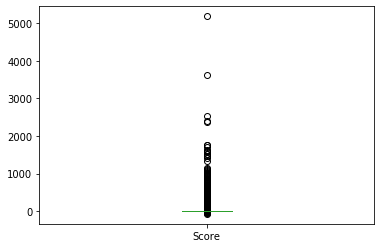

In [69]:
#Now lets plot the box plot for Score column under this dataset
questions_data.Score.plot(kind='box')

In [70]:
#Clearly there are outliers in this data set but we should not remove this as they are genuine cases (There can be good questions with very high scores)

#### Answers Dataset

In [71]:
#Checking for which Users frequently answer the questions
answers_data.OwnerUserId.value_counts()

22656.0      3270
1144035.0    3009
29407.0      2144
548225.0     1924
115145.0     1813
             ... 
495039.0        1
30940.0         1
495062.0        1
495070.0        1
512.0           1
Name: OwnerUserId, Length: 468797, dtype: int64

In [72]:
#Checking for how are the answers given with respect to questions 
answers_data.ParentId.value_counts()

406760      384
38210       300
23930       118
100420       96
40480        69
           ... 
37316970      1
12155240      1
5835110       1
38690550      1
10485760      1
Name: ParentId, Length: 1099938, dtype: int64

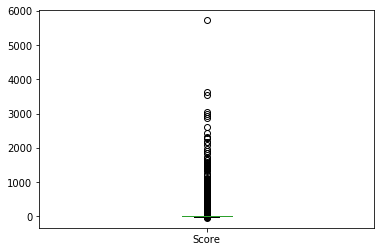

In [73]:
#Lets draw the box plot for Score as well. But as stated for previous dataset we wont tweak it
answers_data.Score.plot(kind='box')

#### Tags Dataset

In [74]:
tags_data.Tag.value_counts()

javascript      125188
java            115212
c#              101186
php              98808
android          90659
                 ...  
monetdblite          1
meekro               1
scitools             1
gae-python27         1
bpy                  1
Name: Tag, Length: 37034, dtype: int64

#### Users Dataset

In [75]:
users_data.views.describe()

count    4.654360e+05
mean     2.400752e+02
std      3.396519e+03
min      0.000000e+00
25%      1.200000e+01
50%      4.500000e+01
75%      1.440000e+02
max      1.835157e+06
Name: views, dtype: float64

In [76]:
users_data_analysis = users_data[-(users_data['views']==1835157)]
users_data_analysis.views.describe()

count    465435.000000
mean        236.132816
std        2074.225277
min           0.000000
25%          12.000000
50%          45.000000
75%         144.000000
max      496316.000000
Name: views, dtype: float64

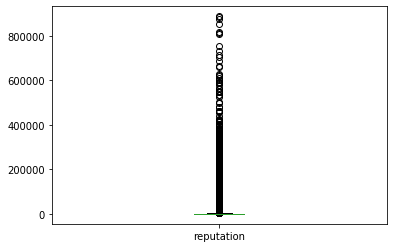

In [77]:
users_data_analysis.reputation.plot(kind = 'box')

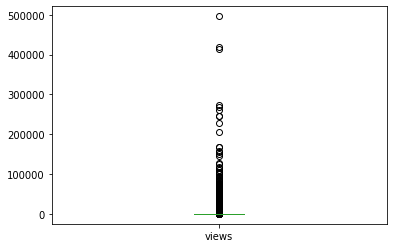

In [78]:
users_data_analysis.views.plot(kind = 'box')

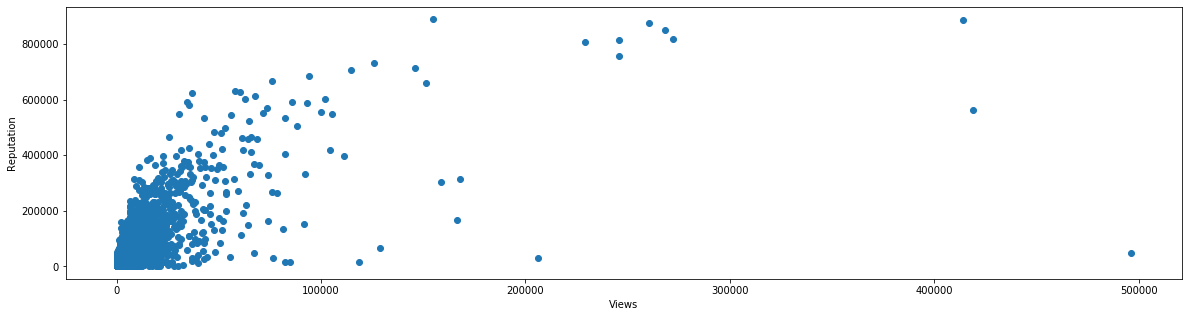

In [79]:
#Scatter plot between Views and Reputation
plt.figure(figsize=(20,5))
plt.scatter(x=users_data_analysis['views'], y = users_data_analysis['reputation'] )
plt.ylabel('Reputation')
plt.xlabel('Views')
plt.show()

In [80]:
#There is a general trend seen above. As the views are increasing, the reputation of the user increases

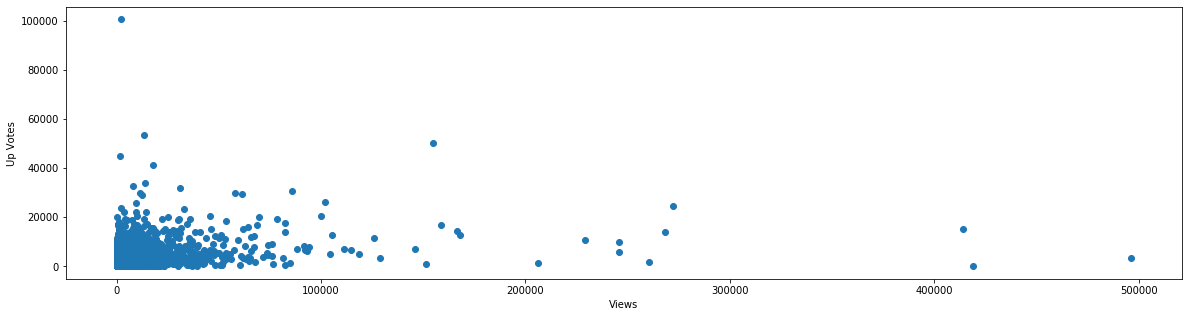

In [81]:
#Scatter plot between Upvotes and Views
plt.figure(figsize=(20,5))
plt.scatter(x=users_data_analysis['views'], y = users_data_analysis['up_votes'])
plt.ylabel('Up Votes')
plt.xlabel('Views')
plt.show()

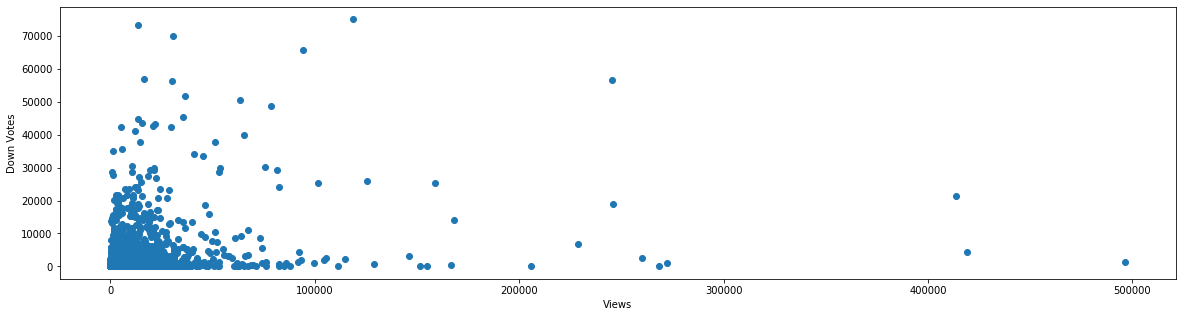

In [82]:
#Scatter plot between Downvotes and Views
plt.figure(figsize=(20,5))
plt.scatter(x=users_data_analysis['views'],y=users_data_analysis['down_votes'])
plt.ylabel('Down Votes')
plt.xlabel('Views')
plt.show()

### Answering the questions (Conclusion)

#### Question 1: When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

Solution:

1. Collect the question ID by filtering out the tags from the tags dataset
2. Filter the above question ID (Parent ID) in answers dataset and get all the corresponding userID.
3. Using these user IDs, get the user name from the Users dataset

Hence we will get all the username who answer the questions (relevant users) with data science tag

In [83]:
# 1. Filter the Tags data set with Tags column = 'python' or 'r' or 'matlab' or 'sas' or 'excel' or 'sql'

data_science_tag = ['python','r','matlab','sas','excel','sql']
data_science_question_id = tags_data[tags_data.Tag.isin(data_science_tag)].Id.tolist()

In [84]:
# 2. Filter the above collected question ID from answers dataset and get the corresponding userID who have answered these questions

data_science_question_users = answers_data[answers_data.ParentId.isin(data_science_question_id)]['OwnerUserId'].astype('int64').tolist()

In [85]:
# 3. Take out the names of the people from the above collected UserID from the users dataset
# Lets also sort by reputation, so that we can send notification to the user with more reputation (and answering data science question) first

final_output_q1 = users_data[users_data.id.isin(data_science_question_users)].sort_values(by=['reputation'],ascending = False).filter(['id','display_name'])
final_output_q1.head()

,id,display_name
5956,22656,Jon Skeet
1846,6309,VonC
3609,157882,BalusC
11731,29407,Darin Dimitrov
163643,1144035,Gordon Linoff


In [86]:
#Lets seperate out the names from above which can be used to store in the RDS Database. (Lets only consider top 5 for now)
output_names = '; '.join(final_output_q1.display_name.tolist()[0:5])
output_names

'Jon Skeet; VonC; BalusC; Darin Dimitrov; Gordon Linoff'

In [87]:
#Storing it in dB
sql = "INSERT INTO stackoverflow(Question,Answer) VALUES(%s,%s)"
val  = ("Question 1", output_names)
cur.execute(sql,val)

In [88]:
#Lets take the ids of the above Person names as well, as Names can be same but User Id will be unique
output_ids = final_output_q1.id.tolist()[0:5]
output_ids

[22656, 6309, 157882, 29407, 1144035]

#### Question 2: When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

Solution:

1. Filter the tags data set based on the tags of data science and get the question id
2. Filter the questions dataset based on the above collected filtered data and note the creation time
3. For the same question id, find the id in answers dataset and note the answer creation date (take the first creation date if multiple answers present for a question).
4. Calculate the difference of creation time of question and creation time of answers for that question, for each question id. And take the mean of time for all the question id, which will give the approx time to get the question answered

In [89]:
# 1. Filter the Tags data set with Tags column = 'python' or 'r' or 'matlab' or 'sas' or 'excel' or 'sql'

data_science_tag = ['python','r','matlab','sas','excel','sql']
data_science_question_id = tags_data[tags_data.Tag.isin(data_science_tag)].Id.tolist()
len(data_science_question_id)

133660

In [90]:
# 2. Filtering the questions dataset for the above collected ID

question_2_filtered_data = questions_data[questions_data.Id.isin(data_science_question_id)].filter(['CreationDate','Id'])
question_2_filtered_data

,CreationDate,Id
2,2008-08-01 15:50:08+00:00,120
22,2008-08-05 06:39:31+00:00,1970
23,2008-08-05 11:49:11+00:00,2120
33,2008-08-05 20:57:00+00:00,2840
46,2008-08-06 23:19:50+00:00,4110
...,...,...
1264184,2016-10-19 22:28:58+00:00,40142550
1264187,2016-10-19 22:33:00+00:00,40142600
1264196,2016-10-19 22:58:38+00:00,40142840
1264197,2016-10-19 23:01:07+00:00,40142860


In [91]:
#Assuming the fastest reply to a question and not the best answer (Max Score) to a question
answers_data[answers_data.ParentId.isin(data_science_question_id)].groupby('ParentId')['CreationDate'].min()

ParentId
120        2008-09-23 22:41:11+00:00
1970       2008-08-05 06:43:30+00:00
2120       2008-08-05 14:26:41+00:00
2840       2008-08-05 20:59:21+00:00
4110       2008-08-06 23:29:21+00:00
                      ...           
40141660   2016-10-19 21:20:36+00:00
40142380   2016-10-19 22:26:55+00:00
40142550   2016-10-19 22:38:05+00:00
40142860   2016-10-19 23:14:50+00:00
40143190   2016-10-19 23:38:17+00:00
Name: CreationDate, Length: 117248, dtype: datetime64[ns, UTC]

In [92]:
#Creating a data frame with a Question Id, its question creation date and fastest answer creation date
question_2_filtered_data_output = pd.merge(question_2_filtered_data,answers_data[answers_data.ParentId.isin(data_science_question_id)].groupby('ParentId')['CreationDate'].min(), how = 'left',left_on = 'Id', right_on = 'ParentId')
question_2_filtered_data_output

,CreationDate_x,Id,CreationDate_y
0,2008-08-01 15:50:08+00:00,120,2008-09-23 22:41:11+00:00
1,2008-08-05 06:39:31+00:00,1970,2008-08-05 06:43:30+00:00
2,2008-08-05 11:49:11+00:00,2120,2008-08-05 14:26:41+00:00
3,2008-08-05 20:57:00+00:00,2840,2008-08-05 20:59:21+00:00
4,2008-08-06 23:19:50+00:00,4110,2008-08-06 23:29:21+00:00
...,...,...,...
130705,2016-10-19 22:28:58+00:00,40142550,2016-10-19 22:38:05+00:00
130706,2016-10-19 22:33:00+00:00,40142600,NaT
130707,2016-10-19 22:58:38+00:00,40142840,NaT
130708,2016-10-19 23:01:07+00:00,40142860,2016-10-19 23:14:50+00:00


In [93]:
question_2_filtered_data_output.isnull().sum()

CreationDate_x        0
Id                    0
CreationDate_y    14751
dtype: int64

In [94]:
#Creation_x represents the question creation date and Creation_y represents its corresponding answer creation date.
#So its clear that there are around 14751 questions whose answers are not available. Lets remove them

question_2_filtered_data_output = question_2_filtered_data_output[-(question_2_filtered_data_output.CreationDate_y.isnull())]
question_2_filtered_data_output

,CreationDate_x,Id,CreationDate_y
0,2008-08-01 15:50:08+00:00,120,2008-09-23 22:41:11+00:00
1,2008-08-05 06:39:31+00:00,1970,2008-08-05 06:43:30+00:00
2,2008-08-05 11:49:11+00:00,2120,2008-08-05 14:26:41+00:00
3,2008-08-05 20:57:00+00:00,2840,2008-08-05 20:59:21+00:00
4,2008-08-06 23:19:50+00:00,4110,2008-08-06 23:29:21+00:00
...,...,...,...
130701,2016-10-19 21:16:09+00:00,40141660,2016-10-19 21:20:36+00:00
130704,2016-10-19 22:13:40+00:00,40142380,2016-10-19 22:26:55+00:00
130705,2016-10-19 22:28:58+00:00,40142550,2016-10-19 22:38:05+00:00
130708,2016-10-19 23:01:07+00:00,40142860,2016-10-19 23:14:50+00:00


In [95]:
#Lets add a column of time difference and take average of that. That will be the approx time to answer the data science question

question_2_filtered_data_output['TimeDiff'] = question_2_filtered_data_output['CreationDate_y']- question_2_filtered_data_output['CreationDate_x']
question_2_filtered_data_output

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CreationDate_x,Id,CreationDate_y,TimeDiff
0,2008-08-01 15:50:08+00:00,120,2008-09-23 22:41:11+00:00,53 days 06:51:03
1,2008-08-05 06:39:31+00:00,1970,2008-08-05 06:43:30+00:00,0 days 00:03:59
2,2008-08-05 11:49:11+00:00,2120,2008-08-05 14:26:41+00:00,0 days 02:37:30
3,2008-08-05 20:57:00+00:00,2840,2008-08-05 20:59:21+00:00,0 days 00:02:21
4,2008-08-06 23:19:50+00:00,4110,2008-08-06 23:29:21+00:00,0 days 00:09:31
...,...,...,...,...
130701,2016-10-19 21:16:09+00:00,40141660,2016-10-19 21:20:36+00:00,0 days 00:04:27
130704,2016-10-19 22:13:40+00:00,40142380,2016-10-19 22:26:55+00:00,0 days 00:13:15
130705,2016-10-19 22:28:58+00:00,40142550,2016-10-19 22:38:05+00:00,0 days 00:09:07
130708,2016-10-19 23:01:07+00:00,40142860,2016-10-19 23:14:50+00:00,0 days 00:13:43


In [96]:
question_2_filtered_data_output[question_2_filtered_data_output.TimeDiff<'0 days 00:00:00']

,CreationDate_x,Id,CreationDate_y,TimeDiff
2809,2009-12-14 23:09:35+00:00,1904170,2009-12-14 21:54:31+00:00,-1 days +22:44:56
8976,2011-02-03 09:44:03+00:00,4884480,2011-02-03 08:52:15+00:00,-1 days +23:08:12
9199,2011-02-14 04:13:55+00:00,4988770,2011-02-13 22:11:07+00:00,-1 days +17:57:12
19155,2012-03-11 03:44:36+00:00,9651970,2012-03-11 03:23:59+00:00,-1 days +23:39:23
32567,2013-02-13 18:48:57+00:00,14860770,2013-02-13 17:49:28+00:00,-1 days +23:00:31


In [97]:
#As its definelty not possible to create a answer before a question, the above data is invalid and lets remove them.

question_2_filtered_data_output = question_2_filtered_data_output[-(question_2_filtered_data_output.TimeDiff<'0 days 00:00:00')]
question_2_filtered_data_output

,CreationDate_x,Id,CreationDate_y,TimeDiff
0,2008-08-01 15:50:08+00:00,120,2008-09-23 22:41:11+00:00,53 days 06:51:03
1,2008-08-05 06:39:31+00:00,1970,2008-08-05 06:43:30+00:00,0 days 00:03:59
2,2008-08-05 11:49:11+00:00,2120,2008-08-05 14:26:41+00:00,0 days 02:37:30
3,2008-08-05 20:57:00+00:00,2840,2008-08-05 20:59:21+00:00,0 days 00:02:21
4,2008-08-06 23:19:50+00:00,4110,2008-08-06 23:29:21+00:00,0 days 00:09:31
...,...,...,...,...
130701,2016-10-19 21:16:09+00:00,40141660,2016-10-19 21:20:36+00:00,0 days 00:04:27
130704,2016-10-19 22:13:40+00:00,40142380,2016-10-19 22:26:55+00:00,0 days 00:13:15
130705,2016-10-19 22:28:58+00:00,40142550,2016-10-19 22:38:05+00:00,0 days 00:09:07
130708,2016-10-19 23:01:07+00:00,40142860,2016-10-19 23:14:50+00:00,0 days 00:13:43


Now lets take the average of TimeDiff column which will be the answer to the question.


We could go here for median as well, but considering mean would help us take into consideration all the questions. Even those questions which took longer to answer. This would give a good idea to the user who is asking the question, and not giving any false hopes of getting question answered quicker (Which would happen if we take median)

In [98]:
mean_time = str(question_2_filtered_data_output.TimeDiff.mean())
mean_time

'7 days 11:17:15.364584'

In [99]:
sql = "INSERT INTO stackoverflow(Question,Answer) VALUES(%s,%s)"
val  = ("Question 2", mean_time)
cur.execute(sql,val)

#### Question 3: While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

Solution:

1. Get the tags which user has raised from the tags data set
2. Filter out the top questions (Based on Score) and show its title to user.

Lets assume that we are going ahead with a question raised by user in data science tags.

In [100]:
data_science_tag = ['python','r','matlab','sas','excel','sql']
data_science_question_id = tags_data[tags_data.Tag.isin(data_science_tag)].Id.tolist()
len(data_science_question_id)

133660

In [101]:
#Lets consider only top 3 scores here

top_question = '; '.join(questions_data[questions_data.Id.isin(data_science_question_id)].sort_values('Score',ascending = False)[0:3].Title.tolist())
top_question

'How do I randomly select an item from a list using Python?; Manually raising (throwing) an exception in Python; How can I do an UPDATE statement with JOIN in SQL?'

In [102]:
sql = "INSERT INTO stackoverflow(Question,Answer) VALUES(%s,%s)"
val  = ("Question 3", top_question)
cur.execute(sql,val)

Hence we get top 3 (here) suggestions to user based on the tags used. Here we have used data science tags but it can be used for any of the tags.

Also, the actual and better solution to this problem would require ML algorithms in NLP like similarity check and context matching, but for the purpose of solving this question using EDA, this method is used

In [103]:
#Lets see our dB

cur.execute("SELECT * FROM stackoverflow")
result = cur.fetchall()
result

[('Top tag used', 'javascript'),
 ('Question 1', 'Jon Skeet; VonC; BalusC; Darin Dimitrov; Gordon Linoff'),
 ('Question 2', '7 days 11:17:15.364584'),
 ('Question 3',
  'How do I randomly select an item from a list using Python?; Manually raising (throwing) an exception in Python; How can I do an UPDATE statement with JOIN in SQL?')]